# CS 168- Homework 2 ---  Created By Ali Hatamizadeh

*   In order to recieve credit for each section, you **MUST** visualize the results. 

*   The maximum points for this homework is **150 points**.





### (0 Points)  Load the image


The shape of the image is: (512, 512, 3) 


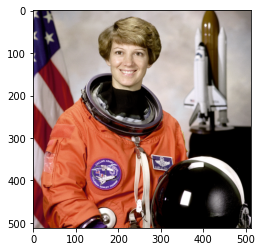

In [ ]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import astronaut

img = astronaut()

plt.figure()
plt.imshow(img)

print('The shape of the image is: {} '.format(np.shape(img)))

### (10 Points) Gray-scale conversion 
---

Convert the image to Grayscale using:

$$L = R * 0.2989 + G * 0.5870 + B * 0.1140$$

Where $R,G,B$ represent the red (first), green (second) and blue (third) channels. 

**Visualize** the results. 

Your output should look like the provided image. 


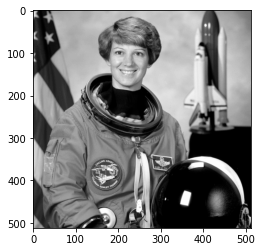

The shape of the gray image is: (512, 512) 


In [ ]:
def rgb2gray(img):
    
    #R is the first channel of the image, G is the second channel of the image, B is the third channel of the image
    

    R=img[:,:,0]
    G=img[:,:,1]
    B=img[:,:,2]

    L=R*0.2989 + G*0.5870 + B*0.1140

    return L

img_gray = rgb2gray(img)
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.show()


print('The shape of the gray image is: {} '.format(np.shape(img_gray)))


### (30 Points) Gaussian Filter Implementation (from scratch)


---

A Gaussian filter can be defined as

$$G_{\sigma}=\dfrac{1}{2\pi\sigma^{2}}e^{-\dfrac{x^{2}+y^2}{2\sigma^{2}}}$$

Implement a function that accepts as an input the standard deviation $\sigma$ and a filter size. 

Using this function, create a 7×7 Gaussian filter with $\sigma=4$. Then, perform a convolution operation where the gray scaled image ( from the previous section) is convoled with this 7×7 Gaussian filter. 

In this section, you can use convolution functionality of scipy ( signal package) as documented in this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). 

Hint 1: For creating the Gaussian filter, use numpy.mgrid to create a grid of x and y cooridnates. Once the x and y coordinates have been created, they can be readily passed to $G_{\sigma}$. 

Hint2: When using the convolution, use the " same " padding. 

**Visualize** the results. 

Your output should look like the provided image. 

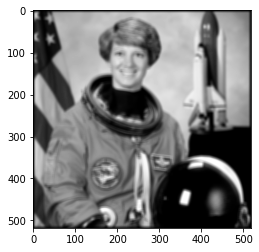

In [ ]:
import math
import scipy.signal

def Gaussian(size,sigma):

  gaussian_filter = np.zeros((size, size))
  #grid = np.mgrid[0:size, 0:size]
  grid = np.mgrid[-size:size+1, -size:size+1]
  
  m = size//2
  n = size//2

  for x in range(-m,m+1):
   for y in range(-n,n+1):
     for i in range(0,size*2):
      first = 2*np.pi*(math.pow(sigma,2))
      second = np.exp(-((math.pow(grid[0,x,i],2)+math.pow(grid[1,y,i],2))/(2*math.pow(sigma,2))))
      gaussian_filter[x+m,y+n]=(1/first)*second
  return gaussian_filter

im_filtered = np.zeros_like(img_gray)
im_filtered = scipy.signal.convolve2d(img_gray[:, :], Gaussian(size=7,sigma=4))

plt.figure()
plt.imshow(im_filtered, cmap='gray')
plt.show()




### (30 Points) Implementing 2D Convolution (from scratch)

---

If $x$ representes an image and $h$ a kernel of size $2k+1\times2k+1$, a convolution operation can be defined as   


$$y[m,n]=\sum_{j=-k}^{k} \sum_{i=-k}^{k} x[i,j] h[m-i,n-j]$$

Implement a function that takes an input image and filter as its input arguments and returns a convolved image. 

It is assumed that this function performs a convolution with stride of one and "same" zero padding. 

You need to pass in the astronaut image and the **Guassian kernel** that you **implemented** in the previous section as the inputs and test your implementation.

**Visualize** the results. 

Your output should look like the provided image. 

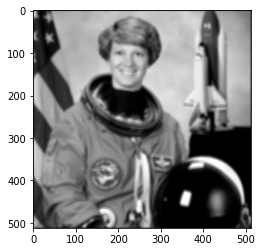

(512, 512)


In [ ]:
def CONV_2D(image, kernel):
  
    #return a convolutional operation that has a .. output size of convolution = input size pf the convolution

    k_h, k_w = np.shape(kernel) #height and weight of kernel
    h, w = np.shape(image)
    #Figure out amount of padding 

    p_y=int((k_h-1)/2)
    p_x= int((k_w-1)/2)

    #initialize the padded image
    padded_img=np.zeros([h+k_h-1,w+k_w-1])

    #copy the image into the padded image
    padded_img[p_y:p_y+h,p_x:p_x+w]= image

    output=np.zeros([h,w])
    kernel = np.flip(kernel)

    for y in range(h):
      for x in range(w):
        image_local_window = padded_img[y:y+k_h,x:x+k_w]
        output[y,x]=np.sum(np.multiply(kernel,image_local_window))

    return output

#write your own gaussian kernel into CONV2D function
my_Gaussian_kernel = Gaussian(7,4)
filtered_img=CONV_2D(img_gray, my_Gaussian_kernel)
    
plt.figure()
plt.imshow(filtered_img, cmap='gray')
plt.show()

print(np.shape(filtered_img))  
    






### (30 Points) Edge Detection
---

( 10 points) Using your **own convolution implementation** from the previous section, [convolve](https://en.wikipedia.org/wiki/Convolution) the **blurred image** with a horizontal [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{X})$.

**Visualize** the results. 

Your output should look like the provided image. 

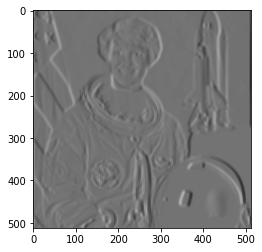

In [ ]:
filter_hsobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.float32)
#filter_vsobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.float32)

filtered_img_sobel=CONV_2D(filtered_img, filter_hsobel)
    
plt.figure()
plt.imshow(filtered_img_sobel, cmap='gray')
plt.show()
















(20 points) Write a function that takes as an input, the **blured image** that you created in the previous section (output of convolution with Gaussian) and return the magnitude of gradient of image according to

$$I=\sqrt{I_{X}^{2}+I_{Y}^{2}}$$

The output of this function should be the detected edges. 

Hints: Follow these steps for implementing such a function:


*   Compute $I_{X}$ by [convolving](https://en.wikipedia.org/wiki/Convolution) the image with a horizontal [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{X})$.
*   Compute $I_{Y}$ by [convolving](https://en.wikipedia.org/wiki/Convolution) the image with a vertical [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{Y})$.
*   Simply use the numpy.hypot function to calculate $I$ using the computed $I_{X}$ and $I_{Y}$. 

For convolution operations, you need to use your **own convolution implementation** from the previous section. 


**Visualize** the results. 

Your output should look like the provided image. 

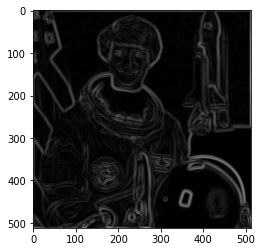

In [ ]:
def grad(img):

  #Horizontal and vertical sobel operators, Gx and Gy
  filter_hsobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.float32)
  filter_vsobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], np.float32)
  
  I_x = CONV_2D(img, filter_hsobel)
  I_y = CONV_2D(img, filter_vsobel)


  result = np.hypot(I_x,I_y)

  return result

plt.figure()
plt.imshow(grad(filtered_img), cmap='gray')
plt.show()







### (50 Points) Image Transformation 
---

Using the loaded moon image below: 

Implement a function from scratch that accept this image as well as a rotation angle. This function should **first** reduce the size of the image by **half** ( scales its height and width by 0.5) and then **rotate** the rescaled image by **180 degrees** about **its center**.

Note: The rotation and scaling operations needs to be **implemented from scratch**. 

Hint 1: First you need to implement the functions that return the affine transform of different operations such as rotation, transformations and scaling aroundn the origin ( the 3 by 3 matrices that were introduced during the lecture). 

Hint 2: Next, for a dersired operation (e.g. rotation about the center of the image), try to come up with the series of affine transformation that achieves it. Subsequently, you need to construct the final affine transform that allows scaling and rotation about the center of the image.  

Hint 3: Once the final affine transform is achieved, you need it to loop through all the pixels in the image and apply the transofrmation to find the new coordinates. 

Hint 4: At last, you need to do bilinear interpolation and find the corresponding pixel values for the newly calculated coordinates. You can use the following bilinear transformation function for this step. 


**Visualize** the results. 

Your output should look like the provided image. 

In [ ]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import moon
import math
from numpy.linalg import inv

img=moon()

#Z is the image
def interp_bilinear(Z, X, Y):

  H,W = np.shape(Z)

#Restrict the X and Y coordinates that falls outside the image
  X[X < 0] = 0
  X[X > W-1]= W-1
  Y[Y < 0] = 0
  Y[Y > H-1] = H-1

  f_val = []

#Bundle coordinates together and loop through them 
  for x, y in zip(X, Y):

    y_min = math.floor(y)
    y_max = math.ceil(y)
    x_min = math.floor(x)
    x_max = math.ceil(x)

    x=x_max-x
    y=y_max-y

    #Choosing the unit square 
    f=Z[y_min,x_min]*(1-x)*(1-y)+Z[y_min,x_max]*y*(1-x)+Z[y_max,x_min]*(1-y)*x+Z[y_max,x_max]*x*y

    f_val.append(f)

  return f_val













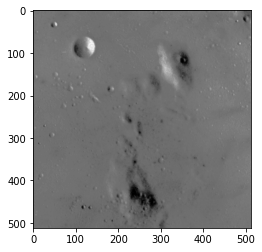

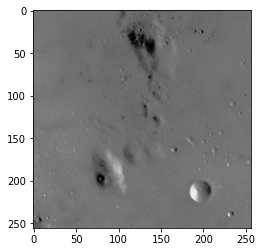

In [ ]:
#Translation, scaling and rotation affine functions

def trans_aff(shift_x, shift_y):
  aff = np.array([[1,0,shift_x],[0,1,shift_y],[0,0,1]])
  return aff

def rot_aff(theta):
  theta=math.radians(theta)
  aff = np.array([[math.cos(theta),-math.sin(theta),0],[math.sin(theta),math.cos(theta),0],[0,0,1]])
  return aff

def scale_aff(scale_x, scale_y):
  aff = np.array([[scale_x, 0, 0],[0,scale_y,0],[0,0,1]])
  return aff


def rotate_center(img,theta):
  h,w = np.shape(img)
  M1 = trans_aff(-w/2, -h/2)
  M2 = rot_aff(theta)
  M3 = trans_aff(w/2,h/2)

  affine=np.matmul(M3, np.matmul(M2,M1))
  return affine

def scale_center(img, sc_x, sc_y):
  h,w = np.shape(img)
  M1 = trans_aff(-w/2, -h/2)
  M2 = scale_aff(sc_x,sc_y)
  M3 = trans_aff(w/2,h/2)

  affine=np.matmul(M3, np.matmul(M2,M1))
  return affine


def transform(img,affine):
  H,W = np.shape(img)

  X_new=[]; Y_new=[];

  for y in range(H):
    for x in range(W):
      x_trans, y_trans, _ = np.matmul(np.array([x,y,1]), inv(affine).T)
      X_new.append(x_trans); Y_new.append(y_trans);
  interp_points = interp_bilinear(img, np.array(X_new), np.array(Y_new))

  return np.reshape(interp_points,[H,W])

affine = scale_center(img,0.5,0.5)
#trans_img = transform(img, affine)
affine2 = rotate_center(img,180)
affine3 = np.matmul(affine2, affine)
trans_img2 = transform(img, affine3)

trans_img2 = trans_img2[128:384, 128:384]

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

plt.figure()
plt.imshow(trans_img2, cmap = 'gray')
plt.show()






